# Andrew Whirisky - 17200679 and Neil Jones - 17202155

In [23]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from IPython.display import display, HTML, Image
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pickle

## Task 1

In [2]:
model_test_accuracy_comparisons = dict()
model_cross_valid_accuracy_comparisons = dict()

cv_folds = 10

In [3]:
# load csv as dataframe 
df = pd.read_csv("state_vectors.csv")
# check head 
df.head(10)

,step,pos_x,pos_y,vel_x,vel_y,ship_lander_angle,ship_lander_angular_vel,leg_1_ground_contact,leg_2_ground_contact,action
0,0,-0.004053,0.937387,-0.410560,-0.215127,0.004703,0.092998,0.0,0.0,3
1,1,-0.008040,0.933774,-0.401600,-0.240878,0.007613,0.058204,0.0,0.0,3
2,2,-0.011951,0.929763,-0.392188,-0.267401,0.008632,0.020372,0.0,0.0,3
3,3,-0.015796,0.925359,-0.383742,-0.293582,0.007955,-0.013536,0.0,0.0,3
4,4,-0.019576,0.920563,-0.375744,-0.319748,0.005674,-0.045625,0.0,0.0,3
5,5,-0.023297,0.915366,-0.368289,-0.346429,0.001900,-0.075480,0.0,0.0,3
6,6,-0.026924,0.909778,-0.356466,-0.372550,-0.004241,-0.122841,0.0,0.0,3
7,7,-0.030488,0.903789,-0.348549,-0.399289,-0.011964,-0.154482,0.0,0.0,0
8,8,-0.034051,0.897401,-0.348526,-0.425961,-0.019686,-0.154454,0.0,0.0,0
9,9,-0.037614,0.890613,-0.348503,-0.452634,-0.027407,-0.154436,0.0,0.0,0


In [4]:
df.shape

(251512, 10)

In [5]:
# Split into features and traget class 
X = df.drop(["action"], axis=1)
Y = df["action"]

In [6]:
# See distrabution of class 
df["action"].value_counts()

0    118113
2    115483
1      9076
3      8840
Name: action, dtype: int64

In [7]:
# Check for presence of missing values
print("Missing Values")
print(df.isnull().sum())

Missing Values
step                       0
pos_x                      0
pos_y                      0
vel_x                      0
vel_y                      0
ship_lander_angle          0
ship_lander_angular_vel    0
leg_1_ground_contact       0
leg_2_ground_contact       0
action                     0
dtype: int64


In [8]:
# Split the data into a training set, a vaidation set, and a test set

X_train, X_test, y_train, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Train Models 

#### Random Forest

In [9]:
# Create classifer object
rf = RandomForestClassifier()
# Fit model on training data
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
# Make a set of predictions for the training data
y_pred = rf.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_train), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.994916447989
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     82668
          1       1.00      0.97      0.98      6433
          2       0.99      1.00      1.00     80740
          3       1.00      0.95      0.97      6217

avg / total       0.99      0.99      0.99    176058

Confusion Matrix


Predicted,0,1,2,3,All
True,,,,,
0,82477,0,188,3,82668
1,144,6216,73,0,6433
2,148,10,80579,3,80740
3,160,0,166,5891,6217
All,82929,6226,81006,5897,176058


In [11]:
# Make a set of predictions for the test data
y_pred = rf.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
model_test_accuracy_comparisons["random forest"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True, dropna = False)

Accuracy: 0.892066689639
             precision    recall  f1-score   support

          0       0.92      0.90      0.91     35445
          1       0.83      0.48      0.60      2643
          2       0.87      0.95      0.91     34743
          3       0.87      0.44      0.59      2623

avg / total       0.89      0.89      0.89     75454

Confusion Matrix


Predicted,0,1,2,3,All
True,,,,,
0,31994,113,3263,75,35445
1,660,1256,727,0,2643
2,1607,143,32897,96,34743
3,691,0,769,1163,2623
All,34952,1512,37656,1334,75454


#### Logisitic Regression

In [12]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Make a set of predictions for the training data
y_pred = log_reg.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_train), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.744038896273
             precision    recall  f1-score   support

          0       0.88      0.63      0.73     82668
          1       0.94      0.28      0.43      6433
          2       0.67      0.94      0.78     80740
          3       0.85      0.24      0.38      6217

avg / total       0.78      0.74      0.73    176058

Confusion Matrix


Predicted,0,1,2,3,All
True,,,,,
0,51713,24,30881,50,82668
1,1209,1775,3447,2,6433
2,4450,89,75984,217,80740
3,1264,0,3431,1522,6217
All,58636,1888,113743,1791,176058


In [14]:
# Make a set of predictions for the test data
y_pred = log_reg.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
model_test_accuracy_comparisons["log_reg"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True, dropna = False)

Accuracy: 0.743525856813
             precision    recall  f1-score   support

          0       0.88      0.62      0.73     35445
          1       0.93      0.29      0.44      2643
          2       0.67      0.94      0.78     34743
          3       0.83      0.23      0.36      2623

avg / total       0.78      0.74      0.73     75454

Confusion Matrix


Predicted,0,1,2,3,All
True,,,,,
0,22016,11,13398,20,35445
1,482,760,1401,0,2643
2,1867,48,32728,100,34743
3,558,0,1467,598,2623
All,24923,819,48994,718,75454


#### Multi Layer Perceptron

In [15]:
mlp = MLPClassifier(solver='adam', alpha=1e-5,\
                     hidden_layer_sizes=(16, 16,8,), random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 16, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
# Make a set of predictions for the training data
y_pred = mlp.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_train), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.897175930659
             precision    recall  f1-score   support

          0       0.95      0.87      0.91     82668
          1       0.82      0.50      0.62      6433
          2       0.86      0.98      0.92     80740
          3       0.86      0.49      0.62      6217

avg / total       0.90      0.90      0.89    176058

Confusion Matrix


Predicted,0,1,2,3,All
True,,,,,
0,72296,527,9538,307,82668
1,1422,3185,1826,0,6433
2,953,169,79448,170,80740
3,1371,0,1820,3026,6217
All,76042,3881,92632,3503,176058


In [17]:
# Make a set of predictions for the test data
y_pred = mlp.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
model_test_accuracy_comparisons["mlp"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True, dropna = False)

Accuracy: 0.898308903438
             precision    recall  f1-score   support

          0       0.95      0.87      0.91     35445
          1       0.82      0.50      0.62      2643
          2       0.86      0.98      0.92     34743
          3       0.86      0.48      0.62      2623

avg / total       0.90      0.90      0.89     75454

Confusion Matrix


Predicted,0,1,2,3,All
True,,,,,
0,30972,209,4123,141,35445
1,582,1328,733,0,2643
2,378,80,34219,66,34743
3,586,0,775,1262,2623
All,32518,1617,39850,1469,75454


#### Evaluate with Cross Validation

In [18]:
scores = cross_val_score(rf, X, Y, cv=cv_folds, n_jobs=-1, verbose = 2)
model_cross_valid_accuracy_comparisons['rf'] = scores.mean()
print(scores)

[ 0.8962748   0.89949509  0.89054984  0.89471592  0.89745935  0.8883941
  0.90258449  0.89304175  0.90131213  0.89172962]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.0s finished


In [19]:
scores = cross_val_score(mlp, X, Y, cv=cv_folds, n_jobs=-1, verbose = 2)
model_cross_valid_accuracy_comparisons['mlp'] = scores.mean()
print(scores)

[ 0.903431    0.95662545  0.87003538  0.92079838  0.87360344  0.92624548
  0.91220676  0.89757455  0.89244533  0.93932406]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished


In [20]:
scores = cross_val_score(log_reg, X, Y, cv=cv_folds, n_jobs=-1, verbose = 2)
model_cross_valid_accuracy_comparisons['Logisitc Regression'] = scores.mean()
print(scores)

[ 0.74428498  0.74329106  0.74539816  0.74521888  0.74621287  0.73758499
  0.74596421  0.74862823  0.74687873  0.73630219]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   33.8s finished


### Evaluate Results

In [25]:
model_cross_valid_accuracy_comparisons

{'Logisitc Regression': 0.74397642966468136,
 'mlp': 0.90922898241429739,
 'rf': 0.895555707640036}

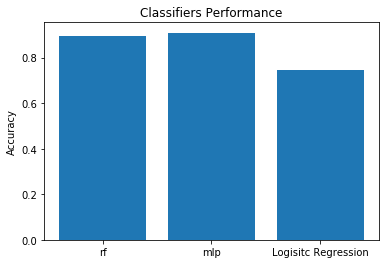

In [24]:
# Plot performance of Classifiers 
plt.bar(range(len(model_cross_valid_accuracy_comparisons)), list(model_cross_valid_accuracy_comparisons.values()), align='center')
plt.xticks(range(len(model_cross_valid_accuracy_comparisons)), list(model_cross_valid_accuracy_comparisons.keys()))
plt.ylabel("Accuracy")
plt.title("Classifiers Performance")
plt.show()

We can see that both the Random Forest Classifier and the Multi Layer Perceptron both clearly outperform the Logistic Regression classifier and the Multi Layer Perceptron just about outperforming the Random Forest Classifier with a mean cross validation score of  0.90922 v 0.89555. 

We decided to train the MLP on the whole dataset before persisting the model.


In [26]:
final_mlp = MLPClassifier(solver='adam', alpha=1e-5,\
                     hidden_layer_sizes=(16, 16,8,), random_state=1)
final_mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 16, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

#### Persist the best model 

In [27]:
filename = 'state_model.sav'
pickle.dump(final_mlp, open(filename, 'wb'))

In [22]:
# model = pickle.load(open("state_model.sav", "rb"))